In [19]:
from keras.preprocessing.image import img_to_array
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.core import Activation, Dense, Flatten
from keras import backend
from keras.optimizers import SGD
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer as lbin

import numpy as np
import matplotlib.pyplot as plt

### Make advanced branching with wrapping $img\_to\_array$ function into a class

In [2]:
class ArrayFromImage:
    
    def __init__(self, data_format=None):
        # data format of the image
        self.data_format = data_format
    def convert(self, image):
        # perform reshaping input image into array 
        return img_to_array(image, data_format=self.data_format)

<center><h2>ShallowNet</h2>
<h4>a CNN with one convolutional layer</h4>

<h4> $ INPUT =>  CONV  =>  RELU  =>   FC $</h4>
</center>


In [3]:
class ShallowNet:
    @staticmethod
    def build(w, h, d, classes):
        # Initialize the model
        model = Sequential()
        # Set the shape of input layer
        input_layer_shape = (h,w,d)
        # Add CONV layer
        model.add(Conv2D(32,(3,3), padding="same", input_shape=input_layer_shape))
        # Set activation function of the CONV layer
        model.add(Activation("relu"))
        # Reshape 32, 3, 3 into 32 * 3 * 3
        model.add(Flatten())
        # Add softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        
        return model

### 1. Try ShallowNet with MNIST dataset

In [4]:
from keras.datasets import mnist

Load MNIST dataset

In [13]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
X_train = X_train / 255
X_test = X_test / 255

Hyperparameters and input shapes

In [15]:
learning_rate = 0.001
optimizer = SGD(learning_rate)
batch_size = 32
w, h = X_train[0].shape
d = 1
classes = 10
epochs = 100
verbose = 1

In [16]:
X_train = X_train.reshape(X_train.shape[0], w, h, 1)
X_test = X_test.reshape(X_test.shape[0], w, h, 1)

In [9]:
(batch_size, h,w)

(32, 28, 28)

Convert labels to one-hot encoding

In [17]:
y_train = lbin().fit_transform(y_train)
y_test = lbin().fit_transform(y_test)

In [18]:
model = ShallowNet.build(w,h,d, classes)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])

tr = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size=batch_size, epochs=epochs, verbose = verbose)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 77us/step - loss: 1.1721 - acc: 0.7537 - val_loss: 0.4996 - val_acc: 0.8745
Epoch 2/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.4451 - acc: 0.8802 - val_loss: 0.3725 - val_acc: 0.8992
Epoch 3/100
60000/60000 [==============================] - 5s 75us/step - loss: 0.3758 - acc: 0.8944 - val_loss: 0.3379 - val_acc: 0.9066
Epoch 4/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.3483 - acc: 0.9011 - val_loss: 0.3196 - val_acc: 0.9106
Epoch 5/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.3319 - acc: 0.9057 - val_loss: 0.3075 - val_acc: 0.9132
Epoch 6/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.3203 - acc: 0.9088 - val_loss: 0.2995 - val_acc: 0.9155
Epoch 7/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.3122 - acc: 0.9116 - val_loss: 0.2929 - 

60000/60000 [==============================] - 4s 69us/step - loss: 0.1682 - acc: 0.9552 - val_loss: 0.1671 - val_acc: 0.9548
Epoch 60/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.1655 - acc: 0.9554 - val_loss: 0.1649 - val_acc: 0.9553
Epoch 61/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.1630 - acc: 0.9568 - val_loss: 0.1625 - val_acc: 0.9565
Epoch 62/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.1604 - acc: 0.9570 - val_loss: 0.1605 - val_acc: 0.9564
Epoch 63/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.1580 - acc: 0.9576 - val_loss: 0.1583 - val_acc: 0.9567
Epoch 64/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.1555 - acc: 0.9585 - val_loss: 0.1563 - val_acc: 0.9574
Epoch 65/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.1530 - acc: 0.9588 - val_loss: 0.1530 - val_acc: 0.9587
Epoch 66/100
60000/60000 [==============

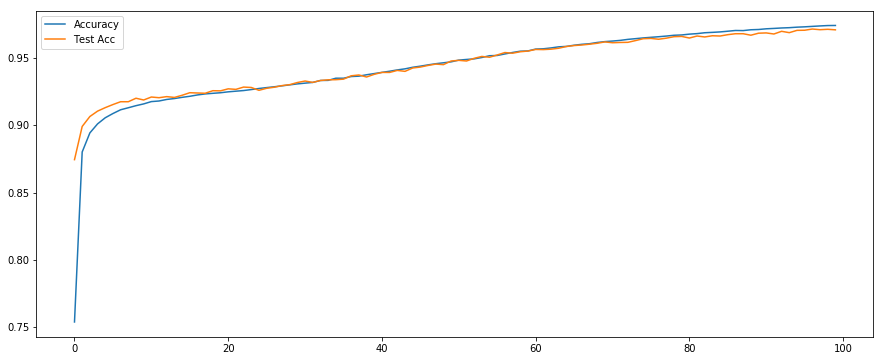

In [28]:
plt.figure(figsize=(15,6))
plt.plot(np.arange(0,epochs), tr.history["acc"])
plt.plot(np.arange(0,epochs), tr.history["val_acc"])
plt.legend(('Accuracy', "Test Acc"))
plt.show()


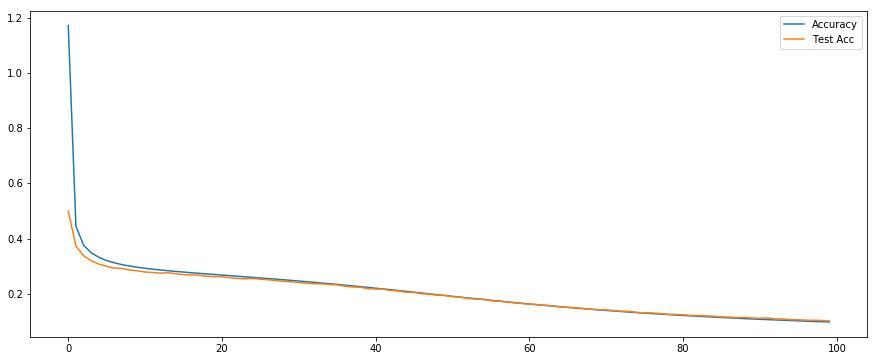

In [29]:
plt.figure(figsize=(15,6))
plt.plot(np.arange(0,epochs), tr.history["loss"])
plt.plot(np.arange(0,epochs), tr.history["val_loss"])
plt.legend(('Accuracy', "Test Acc"))
plt.show()

[Loss, Accuracy]

In [30]:
model.evaluate(X_test, y_test, verbose=1)


10000/10000 [==============================] - 0s 38us/step


[0.10180116315111518, 0.9711]

# 2. ShallowNet with CIFAR-10

In [ ]:
b